# Méthode de boosting (regression)

Ce notebook est dédié à l'analyse des résultats obtenus avec le boosting

Il fait appel au fichier python `boosting.py` qui définit le modèle, l'entraîne et prédit le jeu de test.


In [1]:
from boosting import main_boosting

In [2]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Avec la variable cost_life

## Run le modèle


In [ ]:
params = {
    "n_estimators": 1000,
    "max_depth": 20,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

Temps execution en sec : 3462.714504326
RMSE =  9.427759676485547
R2 =  0.9845898473466792
MAE =  5.170587522125357


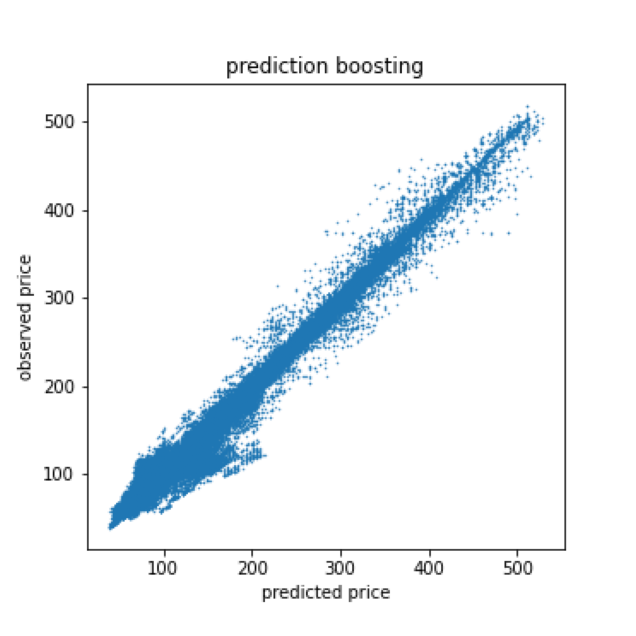

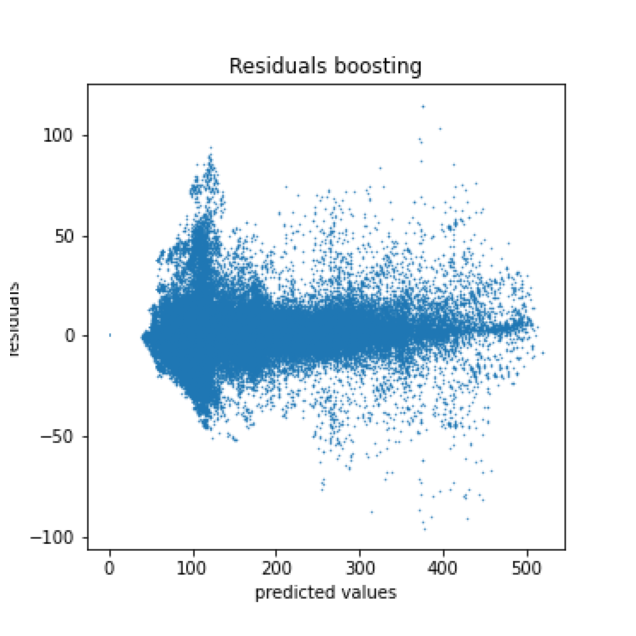

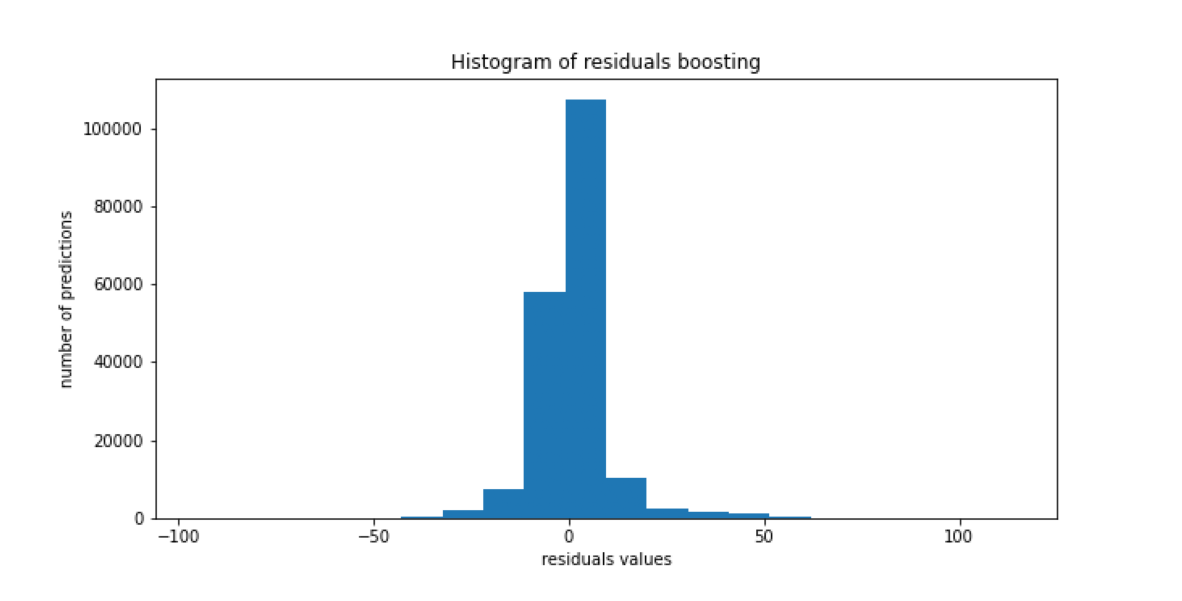

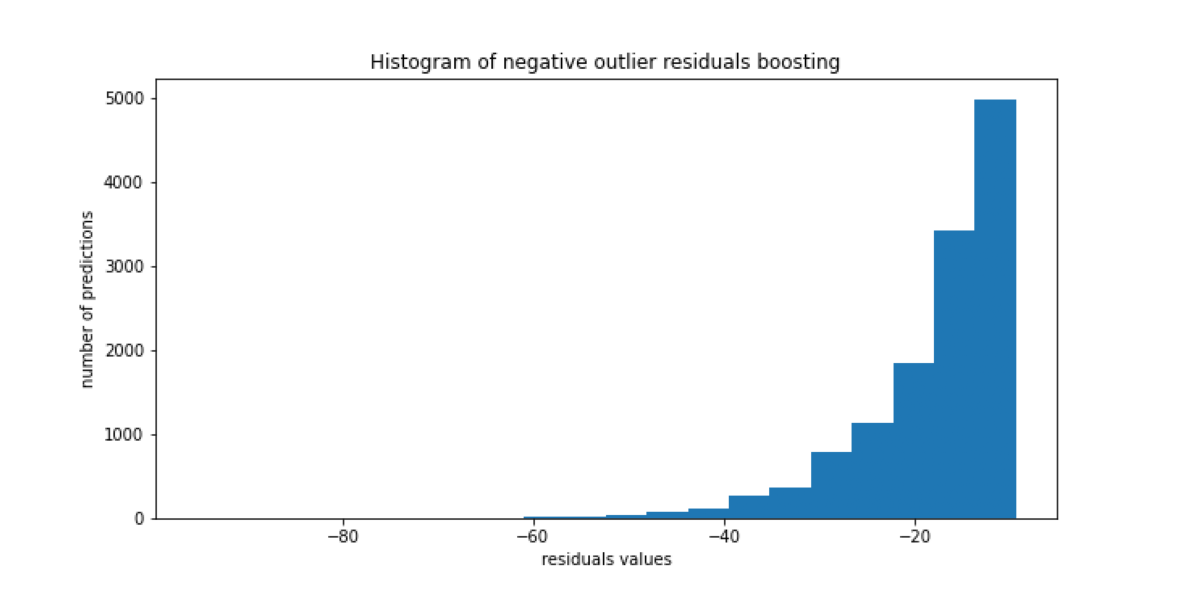

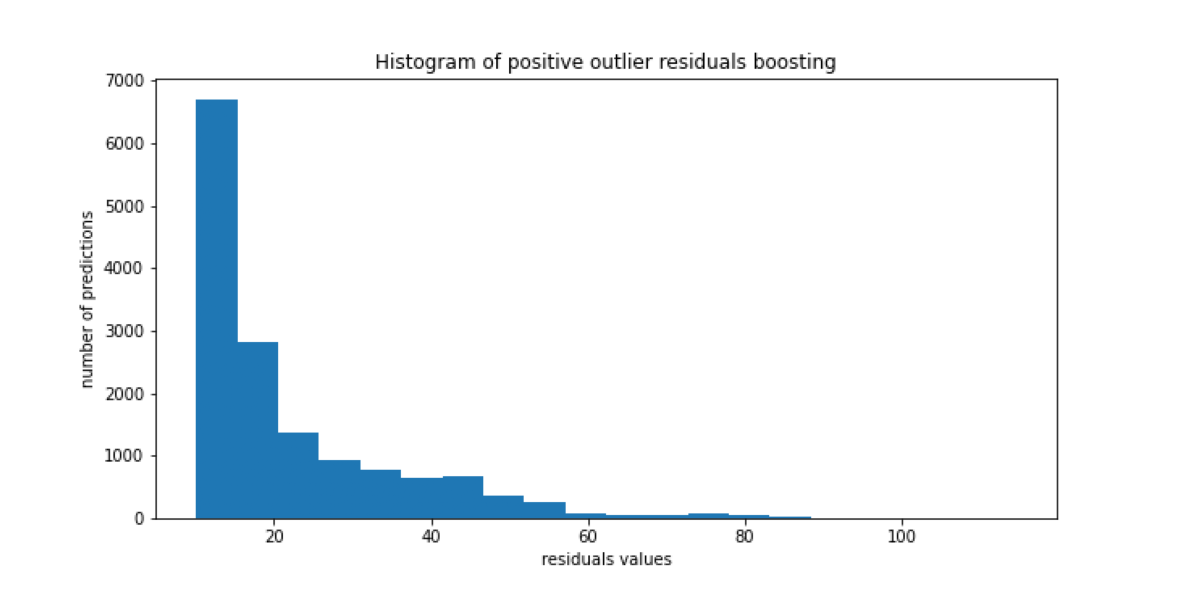

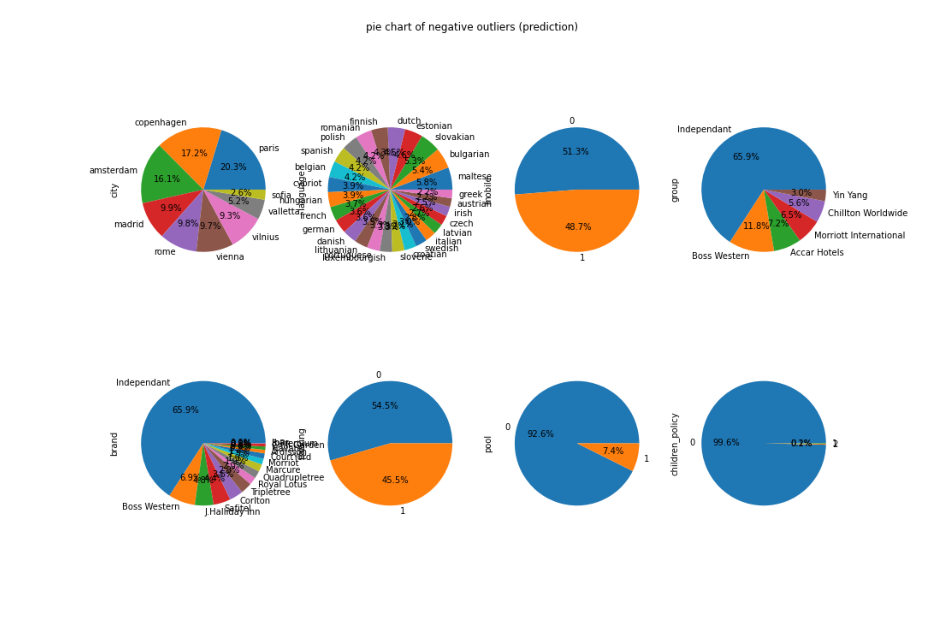

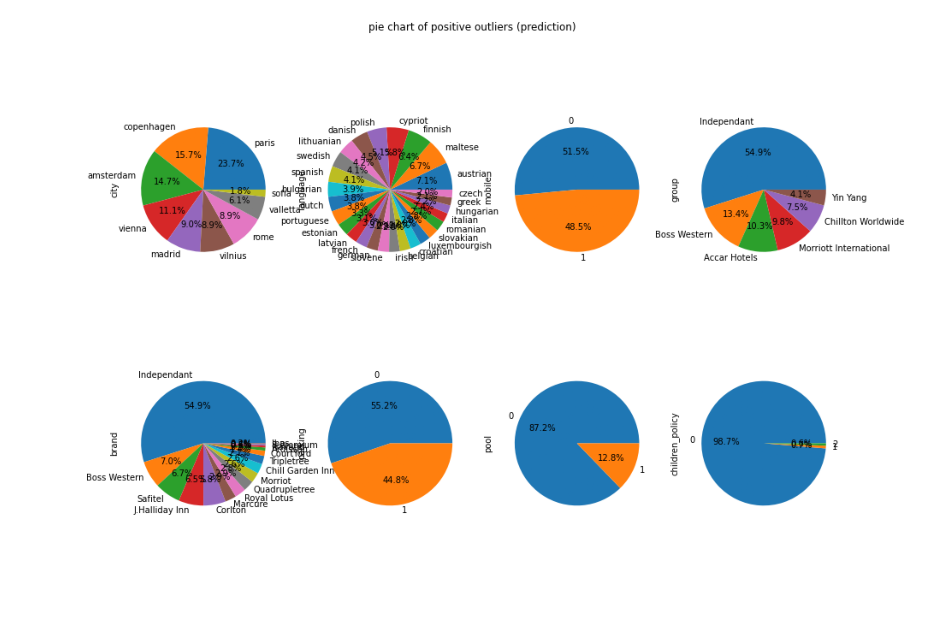

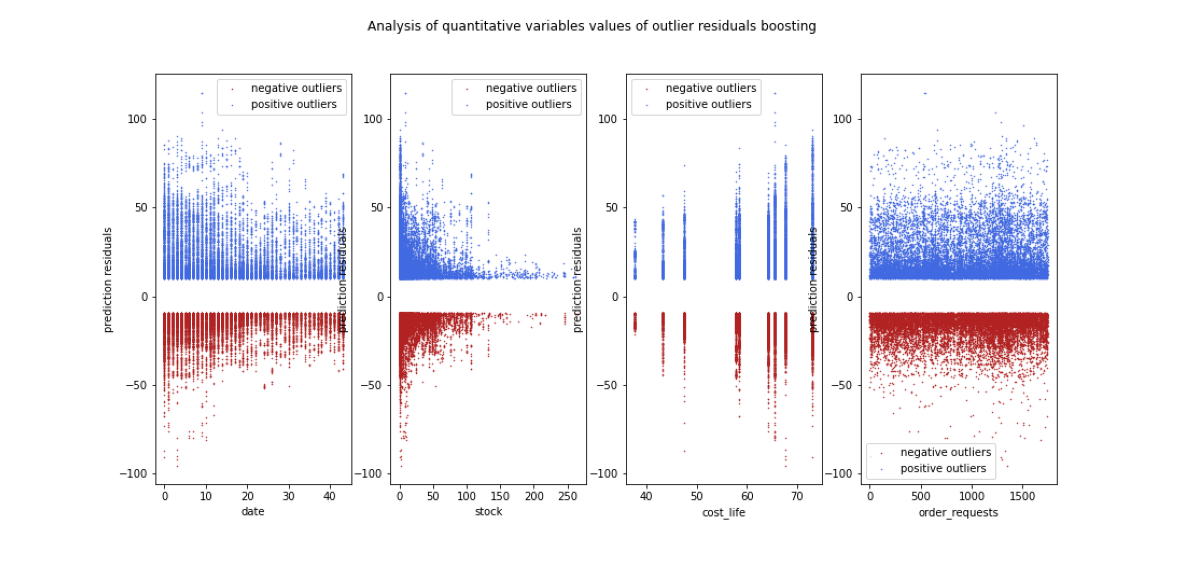

In [16]:
main_boosting(param_opt=params)

## Analyse des résultats 


**Temps d'exécution :**
Temps execution en sec pour l'entrainement : 3462.714504326

**Paramètres optimaux :**
- pas optimisé car puissance de calcul insuffisante

**Score sur l'échantillon de validation :**
- RMSE =  9.427759676485547
- R2 =  0.9845898473466792
- MAE =  5.170587522125357
 

**Analyse des graphiques :**
- Graphe 1 - observations réelles contre les prédictions : Dans l'idéal, se graphique doit se rapprocher le plus possible de la droite identité. On constate bien la présence d'une droite se rapprochant de f(x)=x. Lorsque les prix sont autour de 100-150€, le modèle fait plus d'erreur que lorsque les prix sont élevés. En particulier, il a tendance à surestimer les prix en prédisant des hotels à 200€ alors qu'ils coutent en réalité 100€.

- Graphe 2 - résidus contre les valeurs prédites : Ce graphe confirme l'observation précédente, quand le prix à prédire est autour de 100€, le modèle fait plus d'erreur. On constate une forme en entonnoir du nuage de points vers les prix bas. Dans l'idéal on devrait avoir une répartition uniforme des points, et que les points soient proches de l'axe 0. On remarque que la prédiction est particulièrement bonne pour les plus élevés (meilleure que sur le modèle d'arbre de regression par exemple)

- Graphe 3 - Histogramme des résidus ( $résidus = valeurs\_réelles - valeurs\_predites$) : Ce graphe est utilisé pour voir la répartition des erreurs sur les prédictions. On constate que la majeure partie des erreurs se situent de dans l'intervalle [-25,25].

Les graphes suivants visent à analyser le type de données sur lesquelles portent les erreurs les plus grandes. En particulier on aimerait identifier les données pour lesquelles la prédiction est très mauvaise quand le prix à prédire est autour de 100-150E.

- Graphe 5 et 6 - Histogrammes des résidus outliers : Ce graphe montre la répartition des résidus qui sont des outliers, c'est-à-dire les résidus les plus importants. On remarque que la plupart ont une erreur de moins de 30€. Très peut de résidus ont une erreur supérieure à 60€. 

- Graphe 7 - Pie chart des résidus outliers négatifs : Ce graphe montre la répartition des modalités des variables qualitatives parmi les résidus outliers négatifs, c'est-à-dire pour lesquels le modèle a surestimé la valeur du prix de l'hotel. Ce graphe est à mettre en relation avec la répartition que l'on a sur le jeu de données complet, pour voir quelles sont les modalités les plus présentes dans les données qui ont étét prédites avec de grosses erreurs. On remarque en particulier que 
    - Les hotels indépendants sont présents dans 65.9% des données prédites avec beaucoup d'erreur, alors qu'ils ne représentent que 24.8% du jeu de données.
    - Les proportions des villes les plus grosses (Paris, Amsterdam, Copenhage) sont légèrement plus élevées que dans le jeu de données complets, le modèle a donc eu tendance à estimer sur ces villes des prix élevés pour des hotels qui sont en réalité moins chers. 
    
- Graphe 8 - Pie chart des résidus outliers positfs : Ce graphe montre la répartition des modalités des variables qualitatives parmi les résidus outliers positifs, c'est-à-dire pour lesquels le modèle a sous-estimé la valeur du prix de l'hotel. Ce graphe est à mettre en relation avec la répartition que l'on a sur le jeu de données complet, pour voir quelles sont les modalités les plus présentes dans les données qui ont étét prédites avec de grosses erreurs. On remarque en particulier que 
    - Les hotels indépendants sont présents dans 46.7% des données prédites avec beaucoup d'erreur, alors qu'ils ne représentent que 24.8% du jeu de données.
    - Les proportions des villes les plus grosses (Paris, Amsterdam, Copenhage) sont légèrement plus élevées que dans le jeu de données complets, le modèle a donc eu tendance à estimer sur ces villes des prix faibles pour des hotels qui sont en réalité plus chers. 
 
Des observations similaires concernant les prix des hotels indépendants et les prédictions sur les villes de Paris, Amsterdam et Copenhage ont été faites. Sur la base de ces observations, on peut conclure à une difficulté du modèle pour la prédiction du prix des hotels indépendants et dans les villes de Paris, Amsterdam et Copenhague. Ces villes sont les plus grandes du jeu de données, on peut supposer que la variabilité du prix des hotels dans ces villes est donc plus importante. En effet, on peut supposer que le prix d'un hotel dépend fortement de sa distance au centre. Comme ces villes sont les plus étendues, il peut exister un grand écart de prix entre un hotel du centre ville et de la périphérie. Or nous ne disposons pas de l'information de la situation géographique dans la ville. 

- Graphe 9 - Scatter plot des variables quantitatives pour les résidus outliers positifs et négatifs. Le but de ces graphes est de voir comment se répartissent les valeurs des résidus en fonction des valeurs des variables quantitatives. On remarque que : 
    - Plus le stock est faible, plus l'erreur de prédiction est grande. 
    - Plus la date est faible, plus l'erreur de prédiction est grande
    - Pour order request, l'erreur de prediction est sensiblement homogène quelle que soit la valeur. 
    - Le modèle a tendance à faire moins d'erreurs quand le cout de la vie est faible (cela correspond aux villes de sofia, vilunius et madrid), et cela est cohérent avec nos observations sur le pie chart de la répartition des villes parmi les résidus outliers. 

On conclut donc de ces observations, que notre modèle a plus de difficultés pour prédire la valeur du prix de l'hotel lorsque l'utilisateur fait la requête à une date proche de son départ. En effet, le nombre de lace dispobnible pour une date donnée décroit aussi au fur et à mesure que l'on s'approche de la date du voyage puisque l'hotel se remplit. Enfin, un point positif est que le modèle ne semble pas avoir plus de difficulté à prédire le prix d'un hotel pour un utilisateur qui fait plusieurs requêtes dans le temps ou une seule. 

# Sur les données de l'adversarial network 
## Run le modèle
### choix du n_estimators

In [ ]:
main_boosting(opt_nestimators=0, all_param=0)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................n_estimators=500;, score=0.972 total time= 5.3min
[CV 2/5] END ..................n_estimators=500;, score=0.973 total time= 5.9min
[CV 3/5] END ..................n_estimators=500;, score=0.972 total time= 5.4min
[CV 4/5] END ..................n_estimators=500;, score=0.976 total time= 5.5min
[CV 5/5] END ..................n_estimators=500;, score=0.975 total time= 5.3min
[CV 1/5] END .................n_estimators=1000;, score=0.972 total time=11.8min
[CV 2/5] END .................n_estimators=1000;, score=0.973 total time=12.2min
[CV 3/5] END .................n_estimators=1000;, score=0.972 total time=13.0min
[CV 4/5] END .................n_estimators=1000;, score=0.976 total time=11.9min
[CV 5/5] END .................n_estimators=1000;, score=0.975 total time=11.5min
[CV 1/5] END .................n_estimators=1500;, score=0.972 total time=18.2min
[CV 2/5] END .................n_estimators=1500;,

In [1]:
all_param = {
             "n_estimators": 1500,
             "max_depth": 26,
             "min_samples_split": 5,
             "learning_rate": 0.01,
             "loss": "squared_error"
             }


main_boosting(opt_nestimators=1500, all_param=all_param)